In [12]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from visualization.modules import LayeredModule
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = LayeredModule.from_alexnet(models.alexnet(pretrained=True))

In [3]:
original_img, name, target_class = get_example_data(3, img_path='../old_visual/input_images/')

In [4]:
prep_img = preprocess_image(original_img)

In [5]:
prep_img.shape

torch.Size([1, 3, 224, 179])

In [6]:
nl = NetLens(model, prep_img, target_class)

In [9]:
cam = nl.generate_cam('features-relu-4')
cam.shape

torch.Size([224, 179])

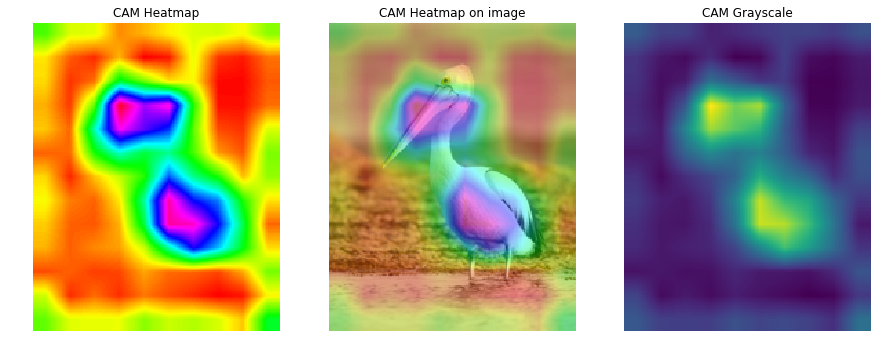

In [10]:
nl.show_gradcam('features-relu-4')

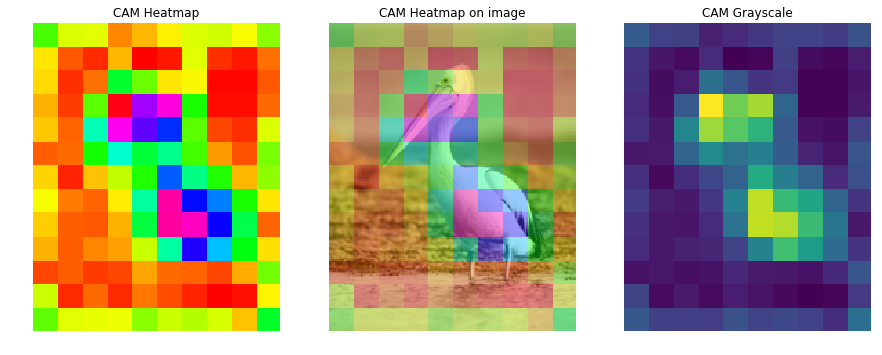

In [11]:
nl.show_gradcam('features-relu-4', interpolate=False)

In [23]:
def get_gradcam(example_index):
    original_img, name, target_class = get_example_data(example_index, img_path='../old_visual/input_images/')
    pretrained_model = models.alexnet(pretrained=True)
    model = LayeredModule.from_alexnet(pretrained_model, hook_to_activations=True)
    prep_img = preprocess_image(original_img)
    NetLens(model, prep_img, target_class).show_gradcam('features-relu-4')

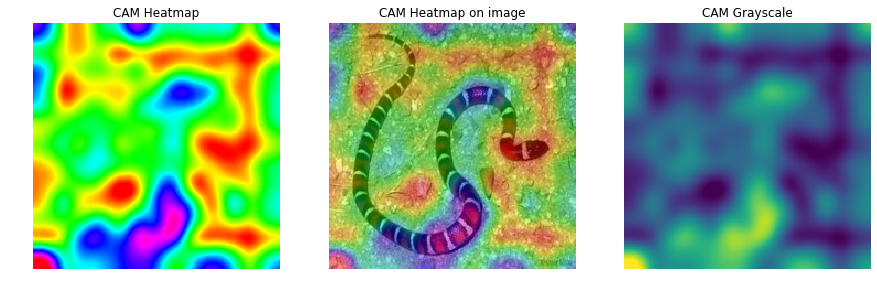

In [24]:
get_gradcam(0)

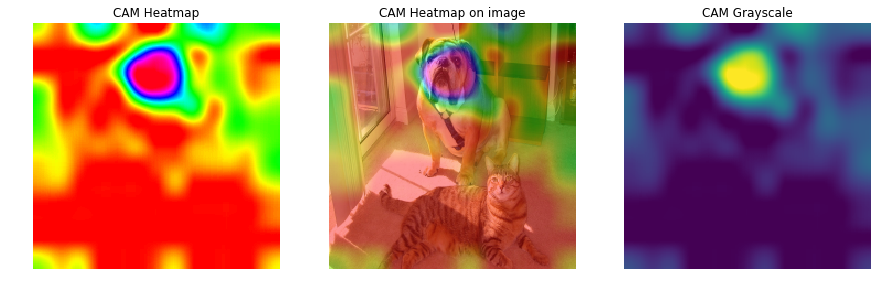

In [25]:
get_gradcam(1)

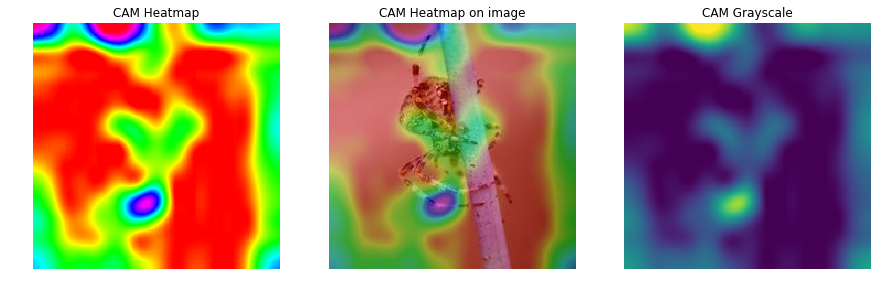

In [26]:
get_gradcam(2)

### Guided GradCAM

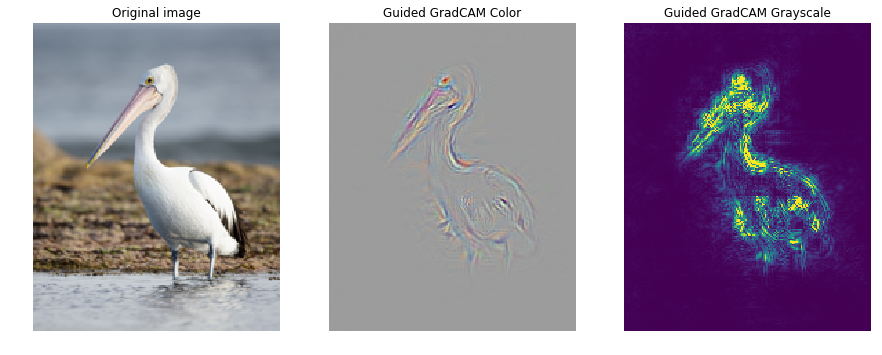

In [13]:
nl.show_guided_gradcam('features-relu-4')

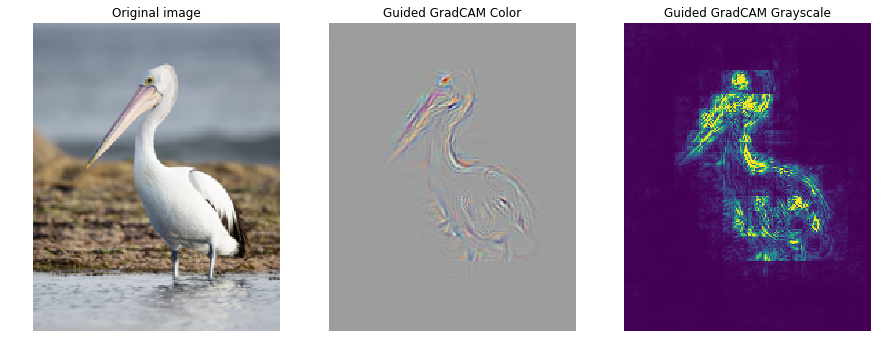

In [14]:
nl.show_guided_gradcam('features-relu-4', interpolate=False)